In [28]:
#2023-4-15
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def se2(alpha_l,alpha_u,chi):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    #chi_collect_se2 = []
    #chi_t = 0.01
    k_t = 0.01
    sigma_0 = 1
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    chi_collect_se2.append(chi_t)
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)

    def y_s(p,t):
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
        return y_gst

    def F(p,t): #F function
        return y_s(p,t)/(np.sqrt(t))

    def T(p,t): #T function
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_t_1 = 0
        sum_t_2 = 0
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_t_1 += np.exp(-1/2*z**2)*T(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            #sum_t_2 += np.exp(-1/2*z**2)*T(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            #sum_f_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)/10
            #sum_f2_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)**2/np.sqrt(2*np.pi)/10
        #chi_new = 1/(1/sigma_0 + alpha_l + alpha_u - alpha_u*sum_t_1)
        k_new = chi*(alpha_l + alpha_u*sum_f_1 )
        sigma_new = chi**2*(alpha_l + alpha_u*sum_f2_1)
        parameter_new = np.array([k_new,sigma_new])
        #chi_collect_se2.append(chi_new)
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        #chi_t = chi_new
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,chi_collect_se2,iter_se2

In [29]:
se = se2(0,1,0.2928)

In [30]:
se[0][-1]

0.5411099703387491

In [26]:
se[1][-1]

0.29280000000000106

In [36]:
#collcetion if SE2
sigma2_collect_se2 = []
k_collect_se2 = []

def se2(alpha_l,alpha,chi):
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-6
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    def y_s(p,t):
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
        return y_gst

    def F(p,t): #F function
        return y_s(p,t)/(np.sqrt(t))

    def T(p,t): #T function
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f = 0
        sum_f2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha*sum_f)
        sigma_new = chi**2*(alpha_l + alpha*sum_f2)
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

In [37]:
se = se2(0,1,0.2928)

In [38]:
se[0][-1]

0.5411099703387491

In [39]:
se[1][-1]

0.29280000000000106

In [152]:
#b = 1/sigma2 fixed sigma_0 = 1
def SE2(alpha_l,alpha,b):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    chi_c = []
    def y_s(p,t):#using iteration to solve y^*
        eps = 1e-12 #epsilon
        y_st = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_st-y_pre)>eps:
            y_pre = y_st
            y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
        return y_st
    def F(p, t):
        return y_s(p,t)/(np.sqrt(t))

    def T(p, t):
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

    k_t = 0.01
    #sigma_s2 = 1
    sigma_t2 = 0
    chi_t = 0.1
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_t = 0
        sum_f = 0
        sum_f2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_t += np.exp(-1/2*z**2)*T(k_t*b+np.sqrt((k_t**2+sigma_t2)*b)*z,chi_t*b)/np.sqrt(2*np.pi)/10
            sum_f += np.exp(-1/2*z**2)*F(k_t*b+np.sqrt((k_t**2+sigma_t2)*b)*z,chi_t*b)/np.sqrt(2*np.pi)/10
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*b+np.sqrt((k_t**2+sigma_t2)*b)*z,chi_t*b)**2/np.sqrt(2*np.pi)/10
        chi_new = 1/(1+(alpha_l+alpha)*b - alpha*b*sum_t)
        k_new = chi_new*b*(alpha_l + alpha*sum_f)
        sigma_new = chi_new**2*b*(alpha_l + alpha*sum_f2)
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        chi_c.append(chi_new)
        chi_t = chi_new
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2[-1],sigma2_collect_se2[-1],chi_c,iter_se2

In [153]:
se = SE2(0,3,1)

In [154]:
#MMSE:
def MMSE(q,m,a):
    return ((m-1)**2*a+q)/a

In [172]:
q_collect8 = []
m_collect8 = []
b_collect8 = []
for i in np.arange(0.01,5.05,0.05):
    se = SE2(1,1,i)
    q_collect8.append(se[1])
    m_collect8.append(se[0])
    b_collect8.append(i)

l = len(q_collect8)

MSE_collect8 = []
for i in range(l):
    MSE_collect8.append(MMSE(q_collect8[i],m_collect8[i],1))

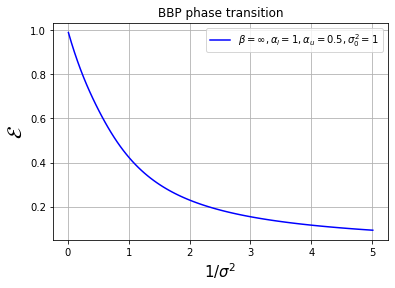

In [173]:
plt.plot(b_collect8,MSE_collect8,c="b",label=r'$\beta = \infty,\alpha_l=1,\alpha_u=0.5,\sigma_0^2=1$')
#plt.plot(b_collect,MSE_collect9,c="gold",label=r'$\beta = \infty,\alpha_l=1,\alpha_u=1.5,\sigma_0^2=1$')
plt.title("BBP phase transition")
plt.ylabel(r'$\mathcal{E}$',fontsize=20)
plt.xlabel(r'$1/\sigma^2$',fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [157]:
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

#sigma_0 = 1
def SE_beta1(alpha_l,alpha_u,sigma_0,b):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    chi = 1/(1/sigma_0 + (alpha_l+alpha_u)*b)
    k_t = 0.01
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_1 = 0
        sum_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_1 += np.exp(-1/2*z**2)*math.tanh(k_t*sigma_0*b+np.sqrt(k_t**2*sigma_0*b+sigma_t2*b)*z)/np.sqrt(2*np.pi)/10
            sum_2 += np.exp(-1/2*z**2)*(math.tanh(k_t*sigma_0*b+np.sqrt(k_t**2*sigma_0*b+sigma_t2*b)*z))**2/np.sqrt(2*np.pi)/10
            
        k_new = chi*b*(alpha_l + alpha_u*sum_1)
        sigma_new = chi**2*b*(alpha_l + alpha_u*sum_2)
        parameter_new = np.array([k_new,sigma_new])
        
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
    
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2[-1],sigma2_collect_se2[-1],iter_se2

In [ ]:
q_collect8 = []
m_collect8 = []
b_collect8 = []
for i in np.arange(0.01,3.55,0.02):
    se = SE2(0.1,0.9,i)
    q_collect8.append(se[1])
    m_collect8.append(se[0])
    b_collect8.append(i)

l = len(q_collect8)

MSE_collect8 = []
for i in range(l):
    MSE_collect8.append(MMSE(q_collect8[i],m_collect8[i],1))
    
q_collect = []
m_collect = []
b_collect = []
for i in np.arange(0.01,3.55,0.02):
    se = SE_beta1(0.1,0.9,1,i)
    q_collect.append(se[1])
    m_collect.append(se[0])
    b_collect.append(i)

#l = len(q_collect)

MSE_collect = []
for i in range(l):
    MSE_collect.append(MMSE(q_collect[i],m_collect[i],1))

In [ ]:
plt.plot(b_collect8,MSE_collect8,c="r",label=r'$\beta = \infty,\alpha_l=1,\alpha_u=0.1,\sigma_0^2=1$')
plt.plot(b_collect,MSE_collect,c="b",label=r'$\beta = 1,\alpha_l=1,\alpha_u=0.1,\sigma_0^2=1$')
plt.title("BBP phase transition")
plt.ylabel(r'$\mathcal{E}$',fontsize=20)
plt.xlabel(r'$1/\sigma^2$',fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [180]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#0.5 alpha_u

rMLE: [0.9900985247041516, 0.9433062396888783, 0.9004270251453375, 0.8608287631125708, 0.8240688637868517, 0.7898238557470931, 0.7578325096440918, 0.7278629078676805, 0.6997035117150434, 0.6731671752273269, 0.6480961108282941, 0.6243622145402797, 0.6018630434893014, 0.580515868801478, 0.5602518658223552, 0.5410114471309586, 0.5227409560226256, 0.505390539676009, 0.4889129007013796, 0.4732626400316705, 0.45839596688224826, 0.44427061719624955, 0.4308458761129675, 0.4180826429217591, 0.4059434993491302, 0.3943927643870493, 0.3833965268347982, 0.372922653900474, 0.3629407776248856, 0.3534222622648331, 0.34434015592528083, 0.3356691304598638, 0.3273854139898373, 0.31946671803790255, 0.3118921596402239, 0.30464218193300036, 0.2976984784704385, 0.2910439204450329, 0.2846624811506371, 0.27853915957948355, 0.2726599111086993, 0.2670115938033969, 0.2615819108729285, 0.2563593456911352, 0.2513330969834903, 0.2464930320150618, 0.2418296561900498, 0.2373340772386318, 0.232997950925993, 0.228813423

In [183]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#0.1 alpha_u

rMLE: [0.9900989128613502, 0.9433782181364507, 0.9008057802790428, 0.861818316200551, 0.8259606619055577, 0.7928589711981453, 0.7622009161057302, 0.7337217653014729, 0.7071947524261066, 0.6824242194153967, 0.6592404534467525, 0.6374955830635773, 0.6170602031833157, 0.5978205604537795, 0.5796761990648156, 0.5625379976263217, 0.5463265351427513, 0.530970732686473, 0.516406723042356, 0.5025769073540898, 0.4894291644213389, 0.47691618441176026, 0.4649949040940109, 0.45362602518276446, 0.442773601051391, 0.43240468001744414, 0.42248899574010496, 0.41299869706391423, 0.40390811115919256, 0.39519353515827327, 0.3868330519978954, 0.3788063662895882, 0.3710946581018116, 0.36368045456337517, 0.35654751546949137, 0.34968072539416134, 0.34306599387577275, 0.3366901754888798, 0.3305410071007189, 0.324607036470179, 0.31887753337379715, 0.3133424205591232, 0.30799225676387154, 0.30281823176971234, 0.2978120997537075, 0.2929660601117828, 0.28827269465627414, 0.2837250232783167, 0.27931658288126593, 0.

In [176]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#1 alpha_u

rMLE: [0.9900980395107428, 0.9432163983377603, 0.8999580162451725, 0.8596272964828892, 0.8218471155685027, 0.7864039860457498, 0.7530880254434151, 0.7216199636671988, 0.691695802573032, 0.6630697601588986, 0.635594858734132, 0.6092119882098027, 0.5839165492065519, 0.5597266599213848, 0.5366617593737206, 0.5147313973865397, 0.4939311561319208, 0.4742426810612622, 0.4556357494201687, 0.4380709853931142, 0.42150261381965903, 0.4058808739784223, 0.39115399689056757, 0.3772697403905015, 0.36417652933597544, 0.3518242664648602, 0.3401648784428062, 0.3291526613496486, 0.3187444694604344, 0.30889979309613375, 0.2995807554046588, 0.29075205310597396, 0.28238085973972804, 0.2744367052326959, 0.2668913420670853, 0.2597186054228062, 0.2528942722628953, 0.2463959230244585, 0.24020280709242048, 0.23429571755890394, 0.22865687065346782, 0.22326979396047672, 0.21811922191168556, 0.21319099927599594, 0.20847199254244694, 0.203950008284525, 0.19961371762436148, 0.19545258657023776, 0.19145681253566033, 

In [196]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#1.2 alpha_u

rMLE: [0.9900978454343498, 0.9431805058176754, 0.8997719915676465, 0.8591600418662508, 0.8210137312606955, 0.7851788513413367, 0.7514462600743255, 0.7194643944391244, 0.6888480969609081, 0.6593236030683967, 0.6307760948507355, 0.6032117873110137, 0.5766968435818893, 0.5513095709563642, 0.5271134310666148, 0.50414614062919, 0.4824183877969591, 0.46191722007414604, 0.4426111129165262, 0.4244551324155047, 0.40739547792609626, 0.3913731655439394, 0.37632685687825074, 0.362194937313903, 0.3489169807189853, 0.33643473447835903, 0.32469274189301534, 0.3136386955529207, 0.30322360194844067, 0.29340180768973056, 0.28413093615361384, 0.27537176388623585, 0.26708806020437414, 0.25924640644380226, 0.2518160064186853, 0.24476849598568137, 0.238077756932288, 0.2317197388782118, 0.22567228943943257, 0.21991499863971434, 0.21442905098565349, 0.20919709057006047, 0.20420309670655842, 0.19943227011144904, 0.19487092889339303, 0.19050641353650782, 0.18632700022689436, 0.18232182190867463, 0.1784807966899

In [210]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#alpha_l0.2 alpha_u0.8

rMLE: [0.998003832992282, 0.9940315475220266, 0.9900796746906885, 0.9861411109763607, 0.9822094800482958, 0.9782794375705034, 0.9743471396380817, 0.9704109495009318, 0.9664724908605482, 0.9625381981209167, 0.9586215595435457, 0.9547462865604602, 0.9509506002274706, 0.9472925896842602, 0.9438559514207082, 0.9407539823869958, 0.9381275250212916, 0.936130745262547, 0.9349005302663708, 0.9345145439193341, 0.9349558917558735, 0.9361050895668128, 0.9377643935392304, 0.9396996127777195, 0.9416790873194335, 0.9434987270592059, 0.9449927022071097, 0.9460343513013587, 0.9465321530129585, 0.9464239130961078, 0.9456709629080715, 0.9442531691253532, 0.9421646401700181, 0.9394105437512781, 0.936004492206732, 0.9319665919961688, 0.9273218761719646, 0.922099131899237, 0.916329952246364, 0.9100480520276212, 0.903288799177669, 0.8960888477901638, 0.8884853807356392, 0.8805146212276567, 0.8722103595646411, 0.8636046845428521, 0.8547325670788206, 0.8456374939754653, 0.8363701873206881, 0.8269747923393549,

In [213]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#alpha_l0.4apha_u0.6

rMLE: [0.9960156991464644, 0.988136049024465, 0.980364004853924, 0.9726875329488777, 0.9650960504357471, 0.9575806113792039, 0.9501341474302493, 0.9427517583246852, 0.9354310375988133, 0.9281724048681461, 0.9209793941175943, 0.9138588233938656, 0.9068207432786253, 0.8998780498755654, 0.8930456499557765, 0.8863391186121877, 0.8797728895775883, 0.8733581578797911, 0.86710081799785, 0.8609998371139388, 0.8550464265498521, 0.8492242168511615, 0.8435103885640239, 0.8378775167647814, 0.8322957428781417, 0.8267349150027488, 0.8211664121315617, 0.8155645000868373, 0.8099072016787161, 0.8041767152220327, 0.7983594830280634, 0.7924460058129364, 0.7864305012149313, 0.7803104648145835, 0.7740862069722496, 0.7677603886578173, 0.7613375843177792, 0.7548238837434256, 0.7482265380946976, 0.7415536543283132, 0.7348139299650637, 0.7280164284789384, 0.721170398288295, 0.714285116127575, 0.7073697626850812, 0.7004333224915746, 0.6934845065748285, 0.6865316953400667, 0.6795828962747318, 0.672645707422677, 

In [216]:
print("rMLE:",MSE_collect8,"--------BO",MSE_collect)#alpha_l0.3apha_u0.7

rMLE: [0.9970087649877404, 0.9910747652488573, 0.9851966733092173, 0.9793648410231401, 0.973570723579587, 0.9678071523554295, 0.9620687188871245, 0.956352295972364, 0.9506577200429873, 0.9449886514755422, 0.9393536016620869, 0.9337670617252666, 0.9282505804775001, 0.9228334864521494, 0.9175527820143632, 0.9124515884478948, 0.9075755415422131, 0.9029669219235323, 0.8986571097052155, 0.8946589885046872, 0.8909615726777587, 0.8875287554896799, 0.8843026827219187, 0.8812106119115468, 0.8781731323594872, 0.8751117456150245, 0.871954576328601, 0.8686398703495941, 0.8651175409693452, 0.8613492970337862, 0.8573078854818573, 0.8529758373511327, 0.8483440827347585, 0.8434105349110391, 0.8381787960209046, 0.8326570023132307, 0.8268568386427875, 0.8207926915438026, 0.814480905120307, 0.8079392850493288, 0.8011865198181688, 0.7942418290085683, 0.78712463460973, 0.779854307646902, 0.772449959516366, 0.7649302358578449, 0.7573130977414133, 0.7496156357220247, 0.7418540723369695, 0.7340440364721117, 0

In [206]:
len(MSE_collect8)

71

In [207]:
len(MSE_collect)

71